In [348]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from operator import itemgetter
from scipy.optimize import minimize 
from qiskit import *
from gen_graph import gen_graph2file, file_2_adj

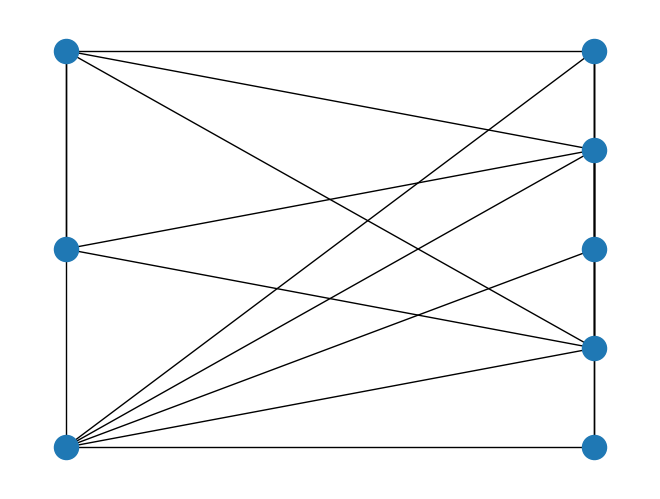

In [349]:
G=nx.Graph()
n=8
prob=0.5
graph_number=10
gen_graph2file.gen_graph_file(n,prob,graph_number)
graph_edges=file_2_adj.get_adj_from_files("./instance_graph/"+str(n)+"_"+str(prob)[2]+".text")
G.add_edges_from(graph_edges[4])
nx.draw(G,pos=nx.bipartite_layout(G,[0,1,2]))

In [350]:
def append_zz_term(qc,q1,q2,gamma):
    qc.cx(q1,q2)
    qc.rz(2*gamma,q2)
    qc.cx(q1,q2)
def get_cost_operator_circuit(G,gamma):
    N=G.number_of_nodes()
    qc=QuantumCircuit(N,N)
    for i,j in G.edges():
        append_zz_term(qc,i,j,gamma)
    return qc

In [351]:
qc=get_cost_operator_circuit(G,np.pi/3)
qc.draw()

»
q_0: ──■────────────────■────■────────────────────────────■─────────■──»
       │                │    │     ┌───┐    ┌──────────┐  │  ┌───┐  │  »
q_1: ──┼────────────────┼────┼─────┤ X ├────┤ Rz(2π/3) ├──┼──┤ X ├──┼──»
     ┌─┴─┐┌──────────┐┌─┴─┐  │     └─┬─┘    └──────────┘  │  └─┬─┘  │  »
q_2: ┤ X ├┤ Rz(2π/3) ├┤ X ├──┼───────■────────────────────┼────■────┼──»
     └───┘└──────────┘└───┘┌─┴─┐┌──────────┐            ┌─┴─┐       │  »
q_3: ──────────────────────┤ X ├┤ Rz(2π/3) ├────────────┤ X ├───────┼──»
                           └───┘└──────────┘            └───┘     ┌─┴─┐»
q_4: ─────────────────────────────────────────────────────────────┤ X ├»
                                                                  └───┘»
q_5: ──────────────────────────────────────────────────────────────────»
                                                                       »
q_6: ──────────────────────────────────────────────────────────────────»
                                                                       »
q_7: ──────────────────────────────────────────────────────────────────»
                                                                       »
c: 8/══════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                              »
«q_0: ──────────────■────■────────────────────────────■─────────■──────────────»
«                   │    │                            │         │              »
«q_1: ──────────────┼────┼────────────────────────────┼─────────┼──────────────»
«                   │    │                            │         │              »
«q_2: ──────────────┼────┼───────■────────────────────┼────■────┼──────────────»
«                   │    │       │                    │    │    │              »
«q_3: ──────────────┼────┼───────┼────────────────────┼────┼────┼───────■──────»
«     ┌──────────┐┌─┴─┐  │     ┌─┴─┐    ┌──────────┐  │  ┌─┴─┐  │     ┌─┴─┐    »
«q_4: ┤ Rz(2π/3) ├┤ X ├──┼─────┤ X ├────┤ Rz(2π/3) ├──┼──┤ X ├──┼─────┤ X ├────»
«     └──────────┘└───┘┌─┴─┐┌──┴───┴───┐└──────────┘┌─┴─┐└───┘  │     └───┘    »
«q_5: ─────────────────┤ X ├┤ Rz(2π/3) ├────────────┤ X ├───────┼──────────────»
«                      └───┘└──────────┘            └───┘     ┌─┴─┐┌──────────┐»
«q_6: ────────────────────────────────────────────────────────┤ X ├┤ Rz(2π/3) ├»
«                                                             └───┘└──────────┘»
«q_7: ─────────────────────────────────────────────────────────────────────────»
«                                                                              »
«c: 8/═════════════════════════════════════════════════════════════════════════»
«                                                                              »
«                                                                              »
«q_0: ──────────────■─────────■────────────────────────────────────────■───────»
«                   │         │                 ┌───┐    ┌──────────┐  │  ┌───┐»
«q_1: ──────────────┼─────────┼─────────────────┤ X ├────┤ Rz(2π/3) ├──┼──┤ X ├»
«                   │         │                 └─┬─┘    └──────────┘  │  └─┬─┘»
«q_2: ──────────────┼─────────┼───────■───────────┼───────────■────────┼────┼──»
«                   │         │       │           │           │        │    │  »
«q_3: ──────────────┼────■────┼───────┼───────────┼───────────┼────────┼────┼──»
«     ┌──────────┐  │  ┌─┴─┐  │       │           │           │        │    │  »
«q_4: ┤ Rz(2π/3) ├──┼──┤ X ├──┼───────┼───────────■───────────┼────────┼────■──»
«     └──────────┘  │  └───┘  │       │                       │        │       »
«q_5: ──────────────┼─────────┼───────┼───────────────────────┼────────┼───────»
«                 ┌─┴─┐       │     ┌─┴─┐    ┌──────────┐   ┌─┴─┐      │       »
«q_6: ────────────┤ X ├───────┼─────┤ X ├────┤ Rz(2π/3) ├───┤ X ├──────┼───────»
«          

In [352]:
def append_x_term(qc,q1,beta):
    qc.rx(2*beta,q1)
def get_mixer_operator_circuit(G,beta):
    N=G.number_of_nodes()
    qc=QuantumCircuit(N,N)
    for n in G.nodes():
        append_x_term(qc,n,beta)
    return qc

In [353]:
qc=get_mixer_operator_circuit(G,np.pi/3)
qc.draw()

┌──────────┐
q_0: ┤ Rx(2π/3) ├
     ├──────────┤
q_1: ┤ Rx(2π/3) ├
     ├──────────┤
q_2: ┤ Rx(2π/3) ├
     ├──────────┤
q_3: ┤ Rx(2π/3) ├
     ├──────────┤
q_4: ┤ Rx(2π/3) ├
     ├──────────┤
q_5: ┤ Rx(2π/3) ├
     ├──────────┤
q_6: ┤ Rx(2π/3) ├
     ├──────────┤
q_7: ┤ Rx(2π/3) ├
     └──────────┘
c: 8/════════════

In [354]:
def get_qaoa_circuit(G,beta,gamma):
    assert(len(beta) == len(gamma))
    p=len(beta)
    N=G.number_of_nodes()
    qc=QuantumCircuit(N,N)
    qc.h(range(N))
    for i in range(p):
        qc &= get_cost_operator_circuit(G,gamma[i])
        qc &= get_mixer_operator_circuit(G,beta[i])
    qc.barrier(range(N))
    qc.measure(range(N),range(N))
    return qc

In [355]:
qc=get_qaoa_circuit(G,[np.pi/3],[np.pi/2])
qc.draw()

┌───┐                                                                  »
q_0: ┤ H ├──■─────────────■────■──────────────────────■─────────■───────────»
     ├───┤  │             │    │    ┌───┐  ┌───────┐  │  ┌───┐  │           »
q_1: ┤ H ├──┼─────────────┼────┼────┤ X ├──┤ Rz(π) ├──┼──┤ X ├──┼───────────»
     ├───┤┌─┴─┐┌───────┐┌─┴─┐  │    └─┬─┘  └───────┘  │  └─┬─┘  │           »
q_2: ┤ H ├┤ X ├┤ Rz(π) ├┤ X ├──┼──────■───────────────┼────■────┼───────────»
     ├───┤└───┘└───────┘└───┘┌─┴─┐┌───────┐         ┌─┴─┐       │           »
q_3: ┤ H ├───────────────────┤ X ├┤ Rz(π) ├─────────┤ X ├───────┼───────────»
     ├───┤                   └───┘└───────┘         └───┘     ┌─┴─┐┌───────┐»
q_4: ┤ H ├────────────────────────────────────────────────────┤ X ├┤ Rz(π) ├»
     ├───┤                                                    └───┘└───────┘»
q_5: ┤ H ├──────────────────────────────────────────────────────────────────»
     ├───┤                                                                  »
q_6: ┤ H ├──────────────────────────────────────────────────────────────────»
     ├───┤                                                                  »
q_7: ┤ H ├──────────────────────────────────────────────────────────────────»
     └───┘                                                                  »
c: 8/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                            »
«q_0: ──■────■──────────────────────■─────────■──────────────────────■───────»
«       │    │                      │         │                      │       »
«q_1: ──┼────┼──────────────────────┼─────────┼──────────────────────┼───────»
«       │    │                      │         │                      │       »
«q_2: ──┼────┼──────■───────────────┼────■────┼──────────────────────┼───────»
«       │    │      │               │    │    │                      │       »
«q_3: ──┼────┼──────┼───────────────┼────┼────┼──────■───────────────┼────■──»
«     ┌─┴─┐  │    ┌─┴─┐  ┌───────┐  │  ┌─┴─┐  │    ┌─┴─┐  ┌───────┐  │  ┌─┴─┐»
«q_4: ┤ X ├──┼────┤ X ├──┤ Rz(π) ├──┼──┤ X ├──┼────┤ X ├──┤ Rz(π) ├──┼──┤ X ├»
«     └───┘┌─┴─┐┌─┴───┴─┐└───────┘┌─┴─┐└───┘  │    └───┘  └───────┘  │  └───┘»
«q_5: ─────┤ X ├┤ Rz(π) ├─────────┤ X ├───────┼──────────────────────┼───────»
«          └───┘└───────┘         └───┘     ┌─┴─┐┌───────┐         ┌─┴─┐     »
«q_6: ──────────────────────────────────────┤ X ├┤ Rz(π) ├─────────┤ X ├─────»
«                                           └───┘└───────┘         └───┘     »
«q_7: ───────────────────────────────────────────────────────────────────────»
«                                                                            »
«c: 8/═══════════════════════════════════════════════════════════════════════»
«                                                                            »
«                                          ┌──────────┐                       »
«q_0: ──■───────────────────────────────■──┤ Rx(2π/3) ├───────────────────────»
«       │             ┌───┐  ┌───────┐  │  └──┬───┬───┘                       »
«q_1: ──┼─────────────┤ X ├──┤ Rz(π) ├──┼─────┤ X ├───────────────────────────»
«       │             └─┬─┘  └───────┘  │     └─┬─┘                           »
«q_2: ──┼──────■────────┼────────■──────┼───────┼────────■────────────────────»
«       │      │        │        │      │       │        │                    »
«q_3: ──┼──────┼────────┼────────┼──────┼───────┼────────┼──────■─────────────»
«       │      │        │        │      │       │        │      │             »
«q_4: ──┼──────┼────────■────────┼──────┼───────■────────┼──────┼────────■────»
«       │      │                 │      │                │      │      ┌─┴─┐  »
«q_5: ──┼──────┼─────────────────┼──────┼────────────────┼──────┼──────┤ X ├──»
«       │    ┌─┴─┐  ┌───────┐  ┌─┴─┐    │                │    

In [356]:
def invert_counts(counts):
    return {k[::-1]:v for k,v in counts.items()}

In [357]:
backend=Aer.get_backend('qasm_simulator')
job=execute(qc,backend)
result=job.result()
print(invert_counts(result.get_counts()))

{'01101100': 1, '10000011': 1, '01100011': 1, '00001111': 4, '01000101': 1, '00011000': 1, '00110011': 1, '01001000': 3, '10110111': 4, '11001110': 3, '10110011': 5, '01110100': 2, '10001000': 3, '01100100': 2, '00100010': 3, '00001110': 3, '00000111': 2, '00000000': 6, '01000011': 3, '10111111': 3, '10011000': 3, '10000110': 2, '01111010': 3, '11011011': 3, '00001100': 3, '00100000': 5, '10101010': 4, '01100101': 4, '01011001': 3, '00111101': 6, '10011110': 3, '10100011': 3, '01111111': 3, '01111000': 5, '01100110': 2, '11011010': 3, '00100001': 4, '10111100': 4, '10101111': 3, '01000111': 2, '11100100': 5, '00011110': 1, '11100010': 4, '11100111': 4, '10101110': 4, '00010000': 3, '11100110': 2, '00010011': 2, '10011111': 1, '01100001': 7, '11011001': 2, '11011101': 8, '01101010': 4, '01110011': 6, '00101001': 1, '11111110': 4, '01111001': 3, '00110001': 2, '01101011': 5, '01111110': 3, '11000000': 5, '10101011': 2, '11111000': 10, '01010000': 3, '01011100': 7, '11010000': 3, '0001010

In [358]:
def maxcut_obj(x,G):
    cut=0
    for i,j in G.edges():
        if x[i]!=x[j]:
            cut-=1
    return cut
# maxcut_obj('00011',G)

In [359]:
def compute_maxcut_energy(counts,G):
    energy=0
    total_counts=0
    for meas,meas_count in counts.items():
        obj_for_meas=maxcut_obj(meas,G)
        energy += obj_for_meas*meas_count
        total_counts+=meas_count
    return energy/total_counts

compute_maxcut_energy(invert_counts(result.get_counts()),G)

-10.056640625

In [360]:
def get_black_box_objective(G,p):
    backend=Aer.get_backend('qasm_simulator')
    def f(theta):
        beta=theta[:p]
        gamma=theta[p:]
        qc=get_qaoa_circuit(G,beta,gamma)
        counts=execute(qc,backend,seed_simulator=10).result().get_counts()
        return compute_maxcut_energy(invert_counts(counts),G)
    return f

In [361]:
p=5
obj=get_black_box_objective(G,p)

init_point=np.array([0.8123581,2.2598744,0.83542615,2.15248697,0.37542168,2.42153654,6.15742415,2.23142144,3.85411452,6.315241])
res_sample=minimize(obj,init_point,method='COBYLA',options={'maxiter':2500,'disp':True})
res_sample


   Normal return from subroutine COBYLA

   NFVALS =  119   F =-1.077930E+01    MAXCV = 0.000000E+00
   X = 1.885177E+00   2.028538E+00   9.102723E-01   2.632761E+00   6.132552E-01
       2.314787E+00   6.148865E+00   2.172922E+00   3.903237E+00   6.338851E+00


 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -10.779296875
       x: [ 1.885e+00  2.029e+00  9.103e-01  2.633e+00  6.133e-01
            2.315e+00  6.149e+00  2.173e+00  3.903e+00  6.339e+00]
    nfev: 119
   maxcv: 0.0

In [362]:
optimal_theta =res_sample['x']
qc=get_qaoa_circuit(G,optimal_theta[:p],optimal_theta[p:])
counts=invert_counts(execute(qc,backend).result().get_counts())
counts

{'11110011': 1,
 '01000110': 1,
 '11000000': 2,
 '10110111': 1,
 '10000100': 1,
 '01011111': 1,
 '00011100': 2,
 '11111000': 2,
 '10101011': 1,
 '00001100': 1,
 '01000100': 1,
 '00101110': 1,
 '01000000': 2,
 '01010101': 2,
 '01010010': 1,
 '11101011': 3,
 '01111011': 1,
 '00000101': 3,
 '01010011': 3,
 '10110110': 1,
 '00010000': 1,
 '10001001': 2,
 '11011100': 1,
 '01001101': 4,
 '10111011': 2,
 '00000000': 1,
 '00111001': 4,
 '00101001': 1,
 '11110001': 4,
 '01010000': 3,
 '10011110': 4,
 '01001011': 6,
 '10111100': 3,
 '00110011': 2,
 '00000001': 5,
 '00110010': 6,
 '11110110': 1,
 '01010100': 1,
 '10000011': 7,
 '00111110': 1,
 '11010001': 3,
 '01000101': 4,
 '11011110': 1,
 '11011111': 1,
 '01111100': 3,
 '10101000': 2,
 '11100011': 2,
 '11111100': 1,
 '10010110': 2,
 '11001010': 1,
 '10101010': 4,
 '01101111': 1,
 '10000101': 2,
 '10111101': 5,
 '11001110': 6,
 '00001101': 6,
 '11001101': 2,
 '00010100': 2,
 '01000011': 3,
 '01000010': 4,
 '11111110': 3,
 '10100011': 10,
 '01101

<BarContainer object of 13 artists>

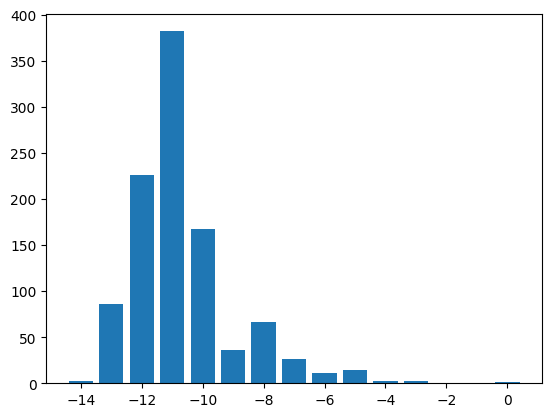

In [363]:
energies=defaultdict(int)
for k,v in counts.items():
    energies[maxcut_obj(k,G)] += v

x,y =zip(*energies.items())
plt.bar(x,y)

Best string : 01110101 with cut: 14


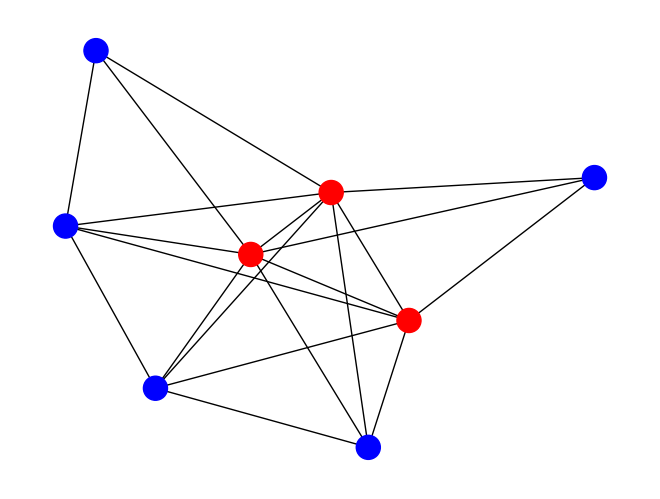

In [364]:
best_cut,best_solution= min([(maxcut_obj(x,G),x) for x in counts.keys()],key=itemgetter(0))
print(f"Best string : {best_solution} with cut: {-best_cut}")

colors=['r' if best_solution[node] == '0' else 'b' for node in G]
nx.draw(G,node_color = colors )

In [365]:
qc=QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
sv=execute(qc,backend=Aer.get_backend('statevector_simulator')).result().get_statevector()
sv

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [366]:
def state_num2str(basis_state_as_num,nqubits):
    return '{0:b}'.format(basis_state_as_num).zfill(nqubits)

def state_str2num(basis_state_as_str):
    return int(basis_state_as_str,2)

def state_reverse(basis_state_as_num,nqubits):
    basis_state_as_str=state_num2str(basis_state_as_num,nqubits)
    new_str=basis_state_as_str[::-1]
    return state_str2num(new_str)

def get_adjusted_state(state):
    nqubits=np.log2(state.shape[0])
    if nqubits%1:
        raise ValueError("Input vector is not a valid statevector for qubits.")
    nqubits=int(nqubits)
    
    adjusted_state=np.zeros(2**nqubits,dtype=complex)
    for basis_state in range(2**nqubits):
        adjusted_state[state_reverse(basis_state,nqubits)]= state[basis_state]
    return adjusted_state
    

In [367]:
def get_qaoa_circuit_sv(G,beta,gamma):
    assert(len(beta) == len(gamma))
    p=len(beta)
    N=G.number_of_nodes()
    qc=QuantumCircuit(N,N)
    qc.h(range(N))
    for i in range(p):
        qc &= get_cost_operator_circuit(G,gamma[i])
        qc &= get_mixer_operator_circuit(G,beta[i])
    # qc.barrier(range(N))
    # qc.measure(range(N),range(N))
    return qc

In [368]:
def state_to_ampl_counts(vec,eps=1e-15):
    qubit_dims=np.log2(vec.shape[0])
    if qubit_dims % 1:
        raise ValueError("Input vector is not a valid statevector for qubits.")
    qubit_dims=int(qubit_dims)
    counts={}
    str_format='0{}b'.format(qubit_dims)
    for kk in range(vec.shape[0]):
        val=vec[kk]
        if val.real**2+val.imag**2 > eps:
            counts[format(kk,str_format)]=val
    return counts

In [369]:
backend=Aer.get_backend('statevector_simulator')
qc=get_qaoa_circuit_sv(G,optimal_theta[:p],optimal_theta[p:])
sv=get_adjusted_state(execute(qc,backend).result().get_statevector())
state_to_ampl_counts(sv)


/tmp/ipykernel_5210/3106174326.py:13: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  nqubits=np.log2(state.shape[0])


{'00000000': (-0.0015193608460558408-0.01541812261498505j),
 '00000001': (-0.03381315261826959+0.047987166516356816j),
 '00000010': (0.04682482437373782-0.013484436432202948j),
 '00000011': (-0.018756406140621178+0.008212035164516567j),
 '00000100': (-0.028487404233987296-0.0002081718837733601j),
 '00000101': (-0.02340032167374804-0.03806312139771621j),
 '00000110': (0.015720974925740802-0.029631429984522027j),
 '00000111': (0.02801462121742747-0.042368536273065624j),
 '00001000': (0.04682482437373785-0.013484436432202922j),
 '00001001': (-0.018756406140621136+0.008212035164516546j),
 '00001010': (0.04130072061833184-0.14387229175141703j),
 '00001011': (0.05176240033794126+0.05029832791347458j),
 '00001100': (0.015720974925740726-0.029631429984522034j),
 '00001101': (0.02801462121742748-0.04236853627306564j),
 '00001110': (-0.03891473304163166+0.08390986575880414j),
 '00001111': (-0.005164962487813528-0.010510649248676835j),
 '00010000': (-0.005895754056774857-0.020431919217422177j),
 

In [370]:
def compute_maxcut_energy_sv(sv,G):
    counts=state_to_ampl_counts(sv)
    return sum(maxcut_obj(np.array([int(x) for x in k]),G)*(np.abs(v)**2) for k,v in counts.items())

compute_maxcut_energy_sv(sv,G)

-10.707396898308367

In [371]:
def get_black_box_objective_sv(G,p):
    backend=Aer.get_backend('statevector_simulator')
    def f(theta):
        beta=theta[:p]
        gamma=theta[p:]
        qc=get_qaoa_circuit_sv(G,beta,gamma)
        sv=execute(qc,backend).result().get_statevector()
        return compute_maxcut_energy_sv(get_adjusted_state(sv),G)
    return f

In [372]:
p=5
obj=get_black_box_objective_sv(G,p)

init_point=np.array([0.8123581,2.2598744,0.83542615,2.15248697,0.37542168,2.42153654,6.15742415,2.23142144,3.85411452,6.315241])
res_sv=minimize(obj,init_point,method='COBYLA',options={'maxiter':2500,'disp':True})
res_sv

/tmp/ipykernel_5210/3106174326.py:13: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  nqubits=np.log2(state.shape[0])



   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS = 2500   F =-1.185252E+01    MAXCV = 0.000000E+00
   X = 1.089276E+00   3.870330E+00   8.400606E-01   3.009344E+00   5.755257E-01
       1.839698E+00   6.200096E+00   2.699968E+00   3.538867E+00   5.976216E+00


 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: -11.85252483163154
       x: [ 1.089e+00  3.870e+00  8.401e-01  3.009e+00  5.755e-01
            1.840e+00  6.200e+00  2.700e+00  3.539e+00  5.976e+00]
    nfev: 2500
   maxcv: 0.0

In [373]:
print(f"Best energy with samples: {res_sample['fun']:.4f}, with full state vector {res_sv['fun']:.5f}")

Best energy with samples: -10.7793, with full state vector -11.85252
